In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

# Principal Components Analysis
from scipy import stats
from sklearn.decomposition import PCA

# Classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [6]:
df = pd.read_csv('Customer_Churn.csv')

In [3]:
df.shape

(7043, 21)

In [7]:
# replace blanks with NAN so you can drop blanks and NAN with the dropNA code
nan_value = float("NaN") # Convert NaN values to empty string
df.replace("", 0, inplace=True)
df.isnull().sum() # check for null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [94]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.dropna(subset=['tenure'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [95]:
# print unique values and unique value count for each column, filter for less than 100 unique values
for column in df:
    unique_vals = np.unique(df[column])
    nbr_unique_vals = len(unique_vals)
    if nbr_unique_vals < 100:
        print("The number of values for {} is: {} -- {}".format(column,nbr_unique_vals,unique_vals))
    else:
        print("The number of values for {} is: {}".format(column,nbr_unique_vals))

The number of values for customerID is: 7043
The number of values for gender is: 2 -- ['Female' 'Male']
The number of values for SeniorCitizen is: 2 -- [0 1]
The number of values for Partner is: 2 -- ['No' 'Yes']
The number of values for Dependents is: 2 -- ['No' 'Yes']
The number of values for tenure is: 73 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
The number of values for PhoneService is: 2 -- ['No' 'Yes']
The number of values for MultipleLines is: 3 -- ['No' 'No phone service' 'Yes']
The number of values for InternetService is: 3 -- ['DSL' 'Fiber optic' 'No']
The number of values for OnlineSecurity is: 3 -- ['No' 'No internet service' 'Yes']
The number of values for OnlineBackup is: 3 -- ['No' 'No internet service' 'Yes']
The number of values for DeviceProtection is: 3 -- ['No' 'No internet service' '

In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [31]:
n = df['tenure'].nunique()
n

73

In [37]:
tenure_count = df.tenure.value_counts().sort_values(ascending=False)
tenure_count

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

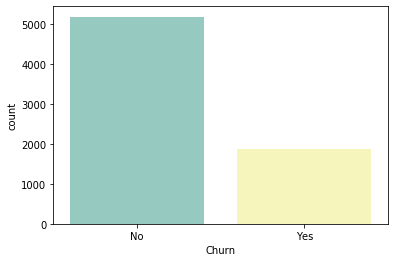

In [39]:
#investigate distribution of y term
sns.countplot(x='Churn', data=df, palette='Set3')

In [40]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [96]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

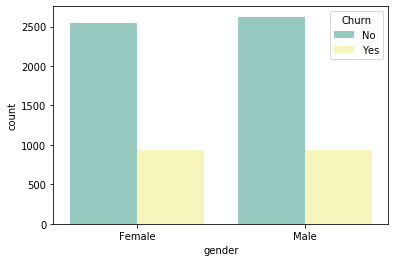

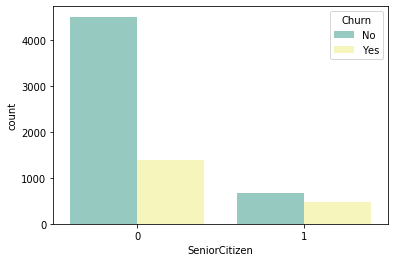

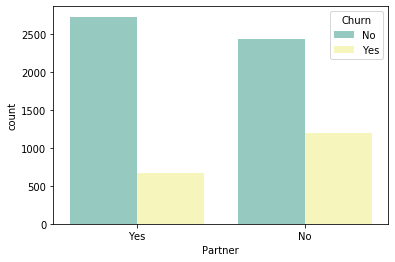

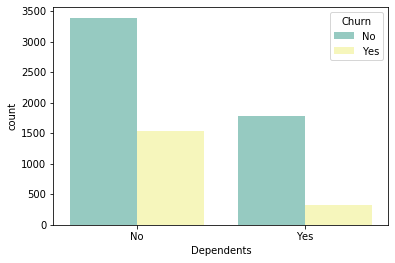

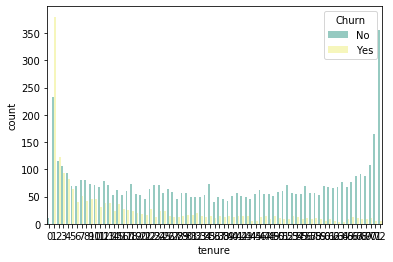

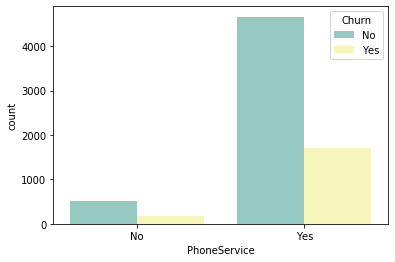

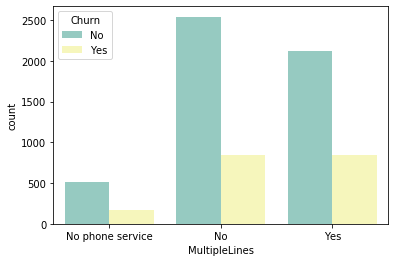

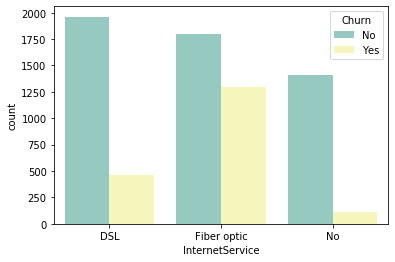

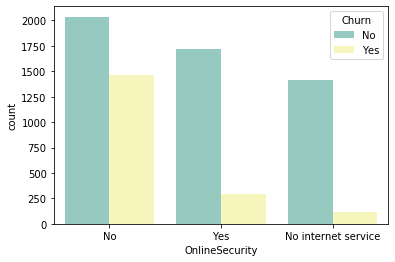

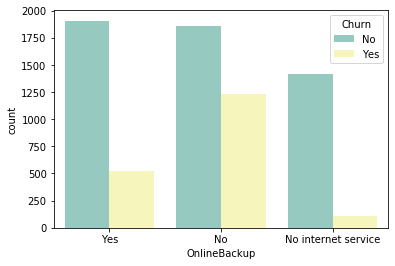

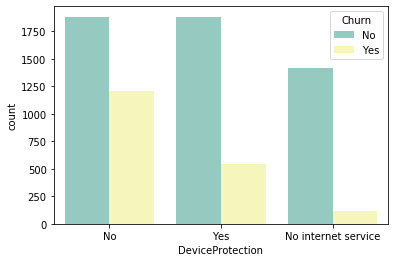

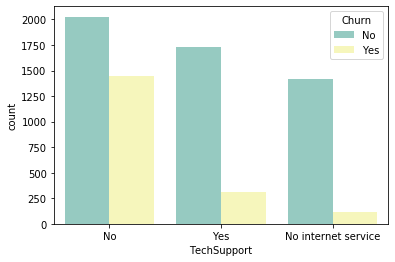

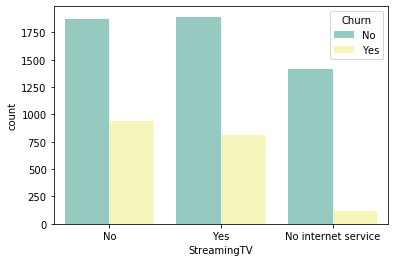

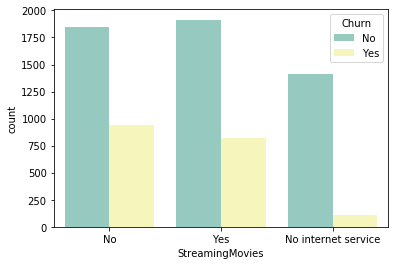

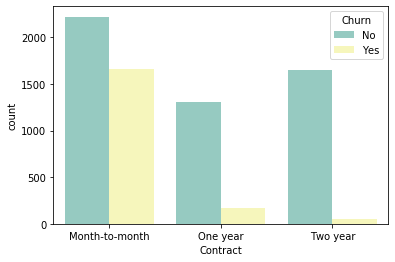

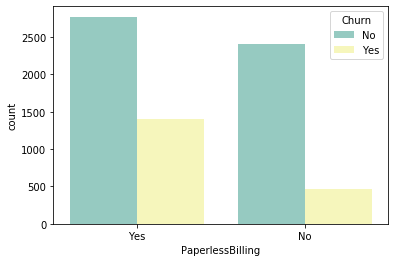

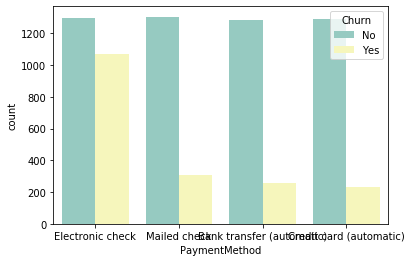

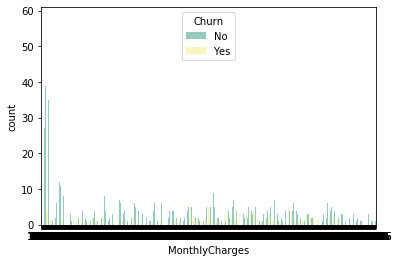

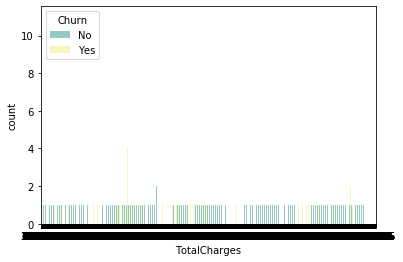

In [43]:
for f in features:
    sns.countplot(x=f, data=df, palette='Set3', hue='Churn')
    plt.show()

In [9]:
dummies = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
           'PaymentMethod']
df_dummy=pd.get_dummies(df,columns=dummies)

In [98]:
print('dummy shape:',df_dummy.shape,'regular shape:', df.shape)


dummy shape: (7043, 48) regular shape: (7043, 21)


In [10]:
#Change y variable into 0 and 1
df_dummy['Churn'][df_dummy['Churn']=='Yes'] = 1
df_dummy['Churn'][df_dummy['Churn']=='No'] = 0

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
df_dummy.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contr

In [11]:
# convert numbers to float and string to NaN
df_dummy['TotalCharges'] = pd.to_numeric(df_dummy['TotalCharges'], errors='coerce')

In [12]:
#replace NaN with 0 for TotalCharges
df_dummy['TotalCharges'] = df_dummy['TotalCharges'].fillna(0)
df_dummy.isnull().sum() # check for null values

customerID                                 0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecu

In [13]:
# Create X and y variable
X = df_dummy.drop(columns=['customerID','Churn'], axis=1)
y =  df_dummy['Churn'].astype(int)

### Feature Selection

In [17]:
# Feature Selection to select the most important features using decision tree
dt = DecisionTreeClassifier(random_state=20, criterion='entropy',max_depth=10)
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [18]:
#put feature importance for each variable in a DF
fi_col=[]
fi_score=[]

for i,column in enumerate(X):
    print('The feature imporance for {} is {}'.format(column,dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi_score.append(dt.feature_importances_[i])

The feature imporance for tenure is 0.13153057587038092
The feature imporance for MonthlyCharges is 0.12860112834577622
The feature imporance for TotalCharges is 0.1299996697628393
The feature imporance for gender_Female is 0.004811900958991247
The feature imporance for gender_Male is 0.0015342010242236953
The feature imporance for SeniorCitizen_0 is 0.01002563055898629
The feature imporance for SeniorCitizen_1 is 0.005930732826559325
The feature imporance for Partner_No is 0.005838306353361749
The feature imporance for Partner_Yes is 0.0037922092710795767
The feature imporance for Dependents_No is 0.007173457721226394
The feature imporance for Dependents_Yes is 0.006627548089351432
The feature imporance for PhoneService_No is 0.0013958813204014119
The feature imporance for PhoneService_Yes is 0.006042088434570738
The feature imporance for MultipleLines_No is 0.010966932521677073
The feature imporance for MultipleLines_No phone service is 0.0011305233369634387
The feature imporance for

In [127]:
fi_df=zip(fi_col,fi_score)
fi_df = pd.DataFrame(fi_df,columns=['feature','importance']).sort_values('importance',ascending=False)

In [142]:
fi_df[fi_df['importance']>0]

,feature,importance
37,Contract_Month-to-month,0.306512
0,tenure,0.131531
2,TotalCharges,0.130000
1,MonthlyCharges,0.128601
17,InternetService_Fiber optic,0.090465
44,PaymentMethod_Electronic check,0.020554
28,TechSupport_No,0.016619
38,Contract_One year,0.014259
30,TechSupport_Yes,0.011330
13,MultipleLines_No,0.010967


### Random Forest Classifier

In [19]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=20)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [31]:
fi_col=[]
fi_score=[]

for i,column in enumerate(X):
    print('The feature imporance for {} is {}'.format(column,rf.feature_importances_[i]))
    
    fi_col.append(column)
    fi_score.append(rf.feature_importances_[i])

The feature imporance for tenure is 0.13621905832937214
The feature imporance for MonthlyCharges is 0.1365868497511748
The feature imporance for TotalCharges is 0.1579852503625558
The feature imporance for gender_Female is 0.01822699250094655
The feature imporance for gender_Male is 0.018021188417080974
The feature imporance for SeniorCitizen_0 is 0.011800722929387825
The feature imporance for SeniorCitizen_1 is 0.012294996236944253
The feature imporance for Partner_No is 0.014800420943165055
The feature imporance for Partner_Yes is 0.014651386159012117
The feature imporance for Dependents_No is 0.012796716282283778
The feature imporance for Dependents_Yes is 0.012137078386335926
The feature imporance for PhoneService_No is 0.00324067452597685
The feature imporance for PhoneService_Yes is 0.002860034449241883
The feature imporance for MultipleLines_No is 0.013394072106737561
The feature imporance for MultipleLines_No phone service is 0.0027681315898350476
The feature imporance for Mult

In [21]:
fi_df=zip(fi_col,fi_score)
fi_df = pd.DataFrame(fi_df,columns=['feature','importance']).sort_values('importance',ascending=False)

In [22]:
fi_df

,feature,importance
2,TotalCharges,0.157985
1,MonthlyCharges,0.136587
0,tenure,0.136219
37,Contract_Month-to-month,0.051874
39,Contract_Two year,0.028674
19,OnlineSecurity_No,0.026146
44,PaymentMethod_Electronic check,0.025551
17,InternetService_Fiber optic,0.022618
28,TechSupport_No,0.018646
3,gender_Female,0.018227


### Gradient Boost

In [39]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0)
gb.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
gb_col=[]
gb_score=[]

for i,column in enumerate(X):
    print('The feature imporance for {} is {}'.format(column,gb.feature_importances_[i]))
    
    gb_col.append(column)
    gb_score.append(gb.feature_importances_[i])

The feature imporance for tenure is 0.15256798299078253
The feature imporance for MonthlyCharges is 0.01352787774324463
The feature imporance for TotalCharges is 0.028129139827209906
The feature imporance for gender_Female is 0.0
The feature imporance for gender_Male is 0.0
The feature imporance for SeniorCitizen_0 is 0.002345870697413563
The feature imporance for SeniorCitizen_1 is 0.0
The feature imporance for Partner_No is 0.0
The feature imporance for Partner_Yes is 0.0
The feature imporance for Dependents_No is 0.0
The feature imporance for Dependents_Yes is 0.0003764918009840689
The feature imporance for PhoneService_No is 0.0
The feature imporance for PhoneService_Yes is 0.0
The feature imporance for MultipleLines_No is 0.011996798499630952
The feature imporance for MultipleLines_No phone service is 0.0
The feature imporance for MultipleLines_Yes is 0.0
The feature imporance for InternetService_DSL is 0.0
The feature imporance for InternetService_Fiber optic is 0.150764522520496

In [41]:
gb_df=zip(gb_col,gb_score)
gb_df = pd.DataFrame(gb_df,columns=['feature','importance']).sort_values('importance',ascending=False)

In [42]:
gb_df

,feature,importance
37,Contract_Month-to-month,0.534320
0,tenure,0.152568
17,InternetService_Fiber optic,0.150765
19,OnlineSecurity_No,0.040835
2,TotalCharges,0.028129
44,PaymentMethod_Electronic check,0.020648
1,MonthlyCharges,0.013528
13,MultipleLines_No,0.011997
38,Contract_One year,0.011687
36,StreamingMovies_Yes,0.009892
